# Entre Opiniones y Vuelos: Explorando la Satisfacción de los Pasajeros con Invistico Airlines

![5-star reviews icon](https://resource.gsx.com/5-star-reviews-icon.png)

### <span style="color:gray">**ÍNDICE**</span>

1) Abstract
2) Invistico Airlines 
3) Prediciendo la satisfacción del cliente 
    1. Encoding
    2. Feature Engineering
    3. Algorithm selection
        1. Train / Test
        2. Variables Predictoras
        3. Modelo 1 - Regresión Logística
            1. Matriz de confusión
            2. Métricas derivadas de la matriz de confusión
            3. Curva ROC
        4. Modelo 2 - Random Forest
            1. Matriz de confusión
            2. Métricas derivadas de la matriz de confusión
            3. Curva ROC
        5. PCA
    4. Conclusiones y elección del modelo

### <span style="color:gray">**1. Abstract**</span>

Este proyecto de ciencia de datos se centra en mejorar la satisfacción del cliente en Invistico Airlines, una aerolínea que enfrenta desafíos significativos con un índice de satisfacción del 55%, considerablemente por debajo del objetivo del 70%. Inspirado en las tendencias y desafíos generales de la industria aérea, abordamos áreas clave, como la relación entre lealtad y satisfacción, la influencia de las clases de viaje, la importancia de servicios online y del aeropuerto, y los impactos de los tiempos de vuelo y retrasos. A través de técnicas de machine learning, buscamos anticipar las preferencias de los clientes y proponemos estrategias específicas, como la mejora de clases de viaje con niveles bajos de satisfacción y la focalización en servicios online y del aeropuerto. Al alinear estas acciones con las tendencias de la industria, aspiramos a elevar la satisfacción del cliente en Invistico Airlines y contribuir a la mejora general de la experiencia del usuario en la industria aérea.

### <span style="color:gray">**2. Invistico Airlines**</span>
El objetivo principal de este proyecto de ciencia de datos es buscar soluciones para mejorar la satisfacción del cliente de una aerolínea mediante el análisis detallado de diversos factores. 
Utilizando técnicas de machine learning, se busca predecir la satisfacción del cliente a través de datos históricos. La meta final es implementar estrategias y cambios específicos en áreas clave, anticipándose a posibles problemas y elevando la satisfacción del cliente a niveles deseados. Este enfoque personalizado, considerando segmentaciones por género, edad, tipo de viaje, clase de vuelo, entre otros, busca garantizar una comprensión profunda de las necesidades y expectativas de los clientes, permitiendo una mejora continua en la experiencia del usuario

La información fue suministrada por una aerolínea que, por diversos motivos, el nombre real de la empresa no se revela, adoptando en su lugar el nombre ficticio de Invistico Airlines.
La base de datos comprende información detallada de clientes que ya han experimentado sus servicios y se han recopilado opiniones de estos, junto con sus datos de vuelo.

El propósito principal de este conjunto de datos es anticipar si un cliente futuro expresaría satisfacción con los servicios, basándose en los detalles de otros parámetros. Adicionalmente, las aerolíneas buscan identificar las áreas específicas de sus servicios que requieren mayor énfasis para cultivar la satisfacción del cliente.

El desafío principal que enfrenta este proyecto reside en la insatisfacción de los usuarios de la aerolínea, evidenciada por un índice de satisfacción del 55%, que se encuentra significativamente por debajo del objetivo establecido del 70%. La tarea fundamental consiste en comprender y abordar las razones detrás de esta disparidad, con el objetivo de implementar estrategias efectivas que eleven el nivel de satisfacción de los usuarios al umbral deseado, respondiendo a la pregunta: ¿cómo aumentar el índice de satisfacción actual de los usuarios de la aerolínea para cumplir con el objetivo establecido del 70%?

La información fue extraída del conjunto de datos "Airlines Customer satisfaction - Customer satisfaction with various other factors" creado por Sayantan Jana y actualizado en 2019. Se puede encontrar el conjunto de datos en la siguiente URL: https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction.

In [66]:
# Antes de empezar
import pandas as pd
import numpy as np
#Formatos
from colorama import Fore, Style
from tabulate import tabulate
colores = ['#0033a0', '#eb0029'] #azul y rojo
colores_satif = ['#eb0029', '#8DB600'] #rojo y verde manzana
def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')
#Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')
from scipy.stats import chi2_contingency
from matplotlib.ticker import FuncFormatter
# Desactivar advertencias específicas
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn") 
#Modelos
import statsmodels.formula.api as sm
import statsmodels.api as sma
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [67]:
# Importo el dataset
print(Style.BRIGHT+Fore.LIGHTRED_EX+'¿Qué información tiene el dataset?'+Style.RESET_ALL)
df_airline = pd.read_csv("C:\\Users\\Flori\\CODERHOUSE\\airlinesatisfaction.csv")  
df = df_airline.sort_values(by='satisfaction', ascending=False)
print(df.info())

# Cambio el formato del campo object
df['satisfaction'] = df['satisfaction'].str.title()
df['Customer Type'] = df['Customer Type'].str.title()
df['Type of Travel'] = df['Type of Travel'].str.title()
df['Class'] = df['Class'].str.title()
satisf = df['satisfaction'].unique()
gender = df['Gender'].unique()
cust_type = df['Customer Type'].unique()
type_travel = df['Type of Travel'].unique()
cust_class = df['Class'].unique()

¿Qué información tiene el dataset?
<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight 

**Descripción de los campos**
<br>
- Satisfaction: satisfacción del pasajero en el overall del viaje (Satisfied o Dissatisfied)
- Gender: género del pasajero (masculino o femenino)
- Customer Type: cliente habitual o no habitual de la aerolínea (Loyal o Disloyal)
- Age: edad del pasajero
- Type of Travel: el propósito del vuelo del pasajero (viaje personal o de negocios)
- Class: negocio, económica, económica plus
- Flight Distance: distancia de vuelo
- Seat comfort: nivel de satisfacción con el asiento (0: no calificado; 1-5)
- Departure/Arrival time convenient: nivel de satisfacción con la hora de salida/llegada (0: no calificado; 1-5)
- Food and drink: nivel de satisfacción con la comida y bebida (0: no calificado; 1-5)
- Gate location: nivel de satisfacción con la ubicación de la puerta de embarque (0: no calificado; 1-5)
- Inflight wifi service: nivel de satisfacción con el servicio de Wi-Fi a bordo (0: no calificado; 1-5)
- Inflight entertainment: nivel de satisfacción con el entretenimiento a bordo (0: no calificado; 1-5)
- Online support: nivel de satisfacción con el soporte online (0: no calificado; 1-5)
- Ease of Online booking: tasa de satisfacción de la reserva en línea (0: no calificado; 1-5)
- On-board service: nivel de satisfacción con el servicio a bordo (0: no calificado; 1-5)
- Leg room service: nivel de satisfacción con el servicio de espacio para las piernas (0: no calificado; 1-5)
- Baggage handling: nivel de satisfacción con el manejo de equipaje (0: no calificado; 1-5)
- Checkin service: nivel de satisfacción con el servicio de check-in (0: no calificado; 1-5)
- Cleanliness: nivel de satisfacción con la limpieza a bordo (0: no calificado; 1-5)
- Online boarding: nivel de satisfacción con el embarque en línea (0: no calificado; 1-5)
- Departure Delay in minutes: retraso de la salida en minutos
- Arrival Delay in minutes: retraso de la llegada en minutos

In [68]:
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Descripción de cada campo'+Style.RESET_ALL)
df.describe()

Descripción de cada campo


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [69]:
#Tratamiento de faltantes. Reemplazo los datos faltantes por cero que es la mediana del campo por la naturaleza de los datos
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

### <span style="color:gray">**3. Prediciendo la satisfacción del cliente**</span>

Se comparan los modelos de clasificación de regresión logística y Random Forest.

#### <span style="color:gray">**3.1. Encoding**</span>

In [70]:
# Estudio los campos object
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Datos en cada campo object'+Style.RESET_ALL)
print('- Satisfaction: ',satisf)
print('- Gender: ',gender)
print('- Customer Type: ',cust_type)
print('- Type of Travel: ',type_travel)
print('- Class: ',cust_class)

Datos en cada campo object
- Satisfaction:  ['Satisfied' 'Dissatisfied']
- Gender:  ['Female' 'Male']
- Customer Type:  ['Loyal Customer' 'Disloyal Customer']
- Type of Travel:  ['Personal Travel' 'Business Travel']
- Class:  ['Eco' 'Business' 'Eco Plus']


In [71]:
#Creo una columna satisfaccion binaria que indica 1 si la respuesta es satisfied y 0 en caso contrario
satisf_binaria = df['satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)
df['satisf_binaria'] = satisf_binaria
df['Es_Satisfied'] = np.where(df['satisf_binaria'] == 1, 1, 0)

#Creo una columna gender_binaria que indica 1 si la respuesta es female y 0 en caso contrario
gender_binaria = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df['gender_binaria'] = gender_binaria
df['Es_Female'] = np.where(df['gender_binaria'] == 1, 1, 0)
df['Es_Male'] = np.where(df['gender_binaria'] == 0, 1, 0)

#Creo una columna loyal_binaria que indica 1 si la respuesta es Loyal y 0 en caso contrario
loyal_binaria = df['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
df['loyal_binaria'] = loyal_binaria
df['Es_LoyalC'] = np.where(df['loyal_binaria'] == 1, 1, 0)

#Creo una columna travel_type que indica 1 si la respuesta es Personal y 2 si es Business
travel_type = df['Type of Travel'].apply(lambda x: 1 if x == 'Personal Travel' else 2)
df['travel_type'] = travel_type
df['Es_PersonalT'] = np.where(df['travel_type'] == 1, 1, 0)
df['Es_BusinessT'] = np.where(df['travel_type'] == 2, 1, 0)

#Creo una columna class_type que indica 1 si la respuesta es Personal y 2 si es Business
class_type = df['Class'].apply(lambda x: 1 if x == 'Business' else 2 if x == 'Eco Plus' else 3)
df['class_type'] = class_type
df['Es_Class1'] = np.where(df['class_type'] == 1, 1, 0)
df['Es_Class2'] = np.where(df['class_type'] == 2, 1, 0)
df['Es_Class3'] = np.where(df['class_type'] == 3, 1, 0)

#### <span style="color:gray">**3.2. Feature engenieering**</span>

Las variables: tienen correlación en términos absolutos superiores a 0.7. Por ende, me quedo sólo con las variables con más importancia.
<br> 
De acá se aperturó por todos los features disponibles en la encuesta realizada, donde el 25% de la importancia se encuentra en "inflight entertainment", seguido de la comodidad del asiento, esto puede relacionarse con la cantidad de usuarios en la clase "Eco" y luego la facilidad de sacar un vuelo online.

In [72]:
#Selecciono las características y la variable objetivo
feature_names = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Es_Female', 'Es_Male', 'Es_LoyalC', 'Es_PersonalT', 'Es_BusinessT', 'Es_Class1', 'Es_Class2', 'Es_Class3']

X = df[feature_names].values
y = df['Es_Satisfied'].values

#Creo un modelo de random forest para las características desagregadas
model = RandomForestClassifier(n_estimators = 150,
                               random_state = 123,
                               max_depth = 7,
                               min_samples_leaf = 100,
                               max_features = 4,
                               criterion = 'entropy')
model.fit(X, y)

feature_importances = model.feature_importances_*100

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance [%]': feature_importances})
importance_df = importance_df.sort_values('Importance [%]', ascending=False)
importance_df.sort_values(by = 'Importance [%]', ascending = False)

,Feature,Importance [%]
7,Inflight entertainment,25.761212
2,Seat comfort,14.246091
9,Ease of Online booking,8.711547
8,Online support,7.831035
20,Es_LoyalC,4.829227
10,On-board service,4.206187
11,Leg room service,3.883770
23,Es_Class1,3.842006
4,Food and drink,3.571200
15,Online boarding,3.203134


<Axes: title={'center': 'Correlation Matrix'}>

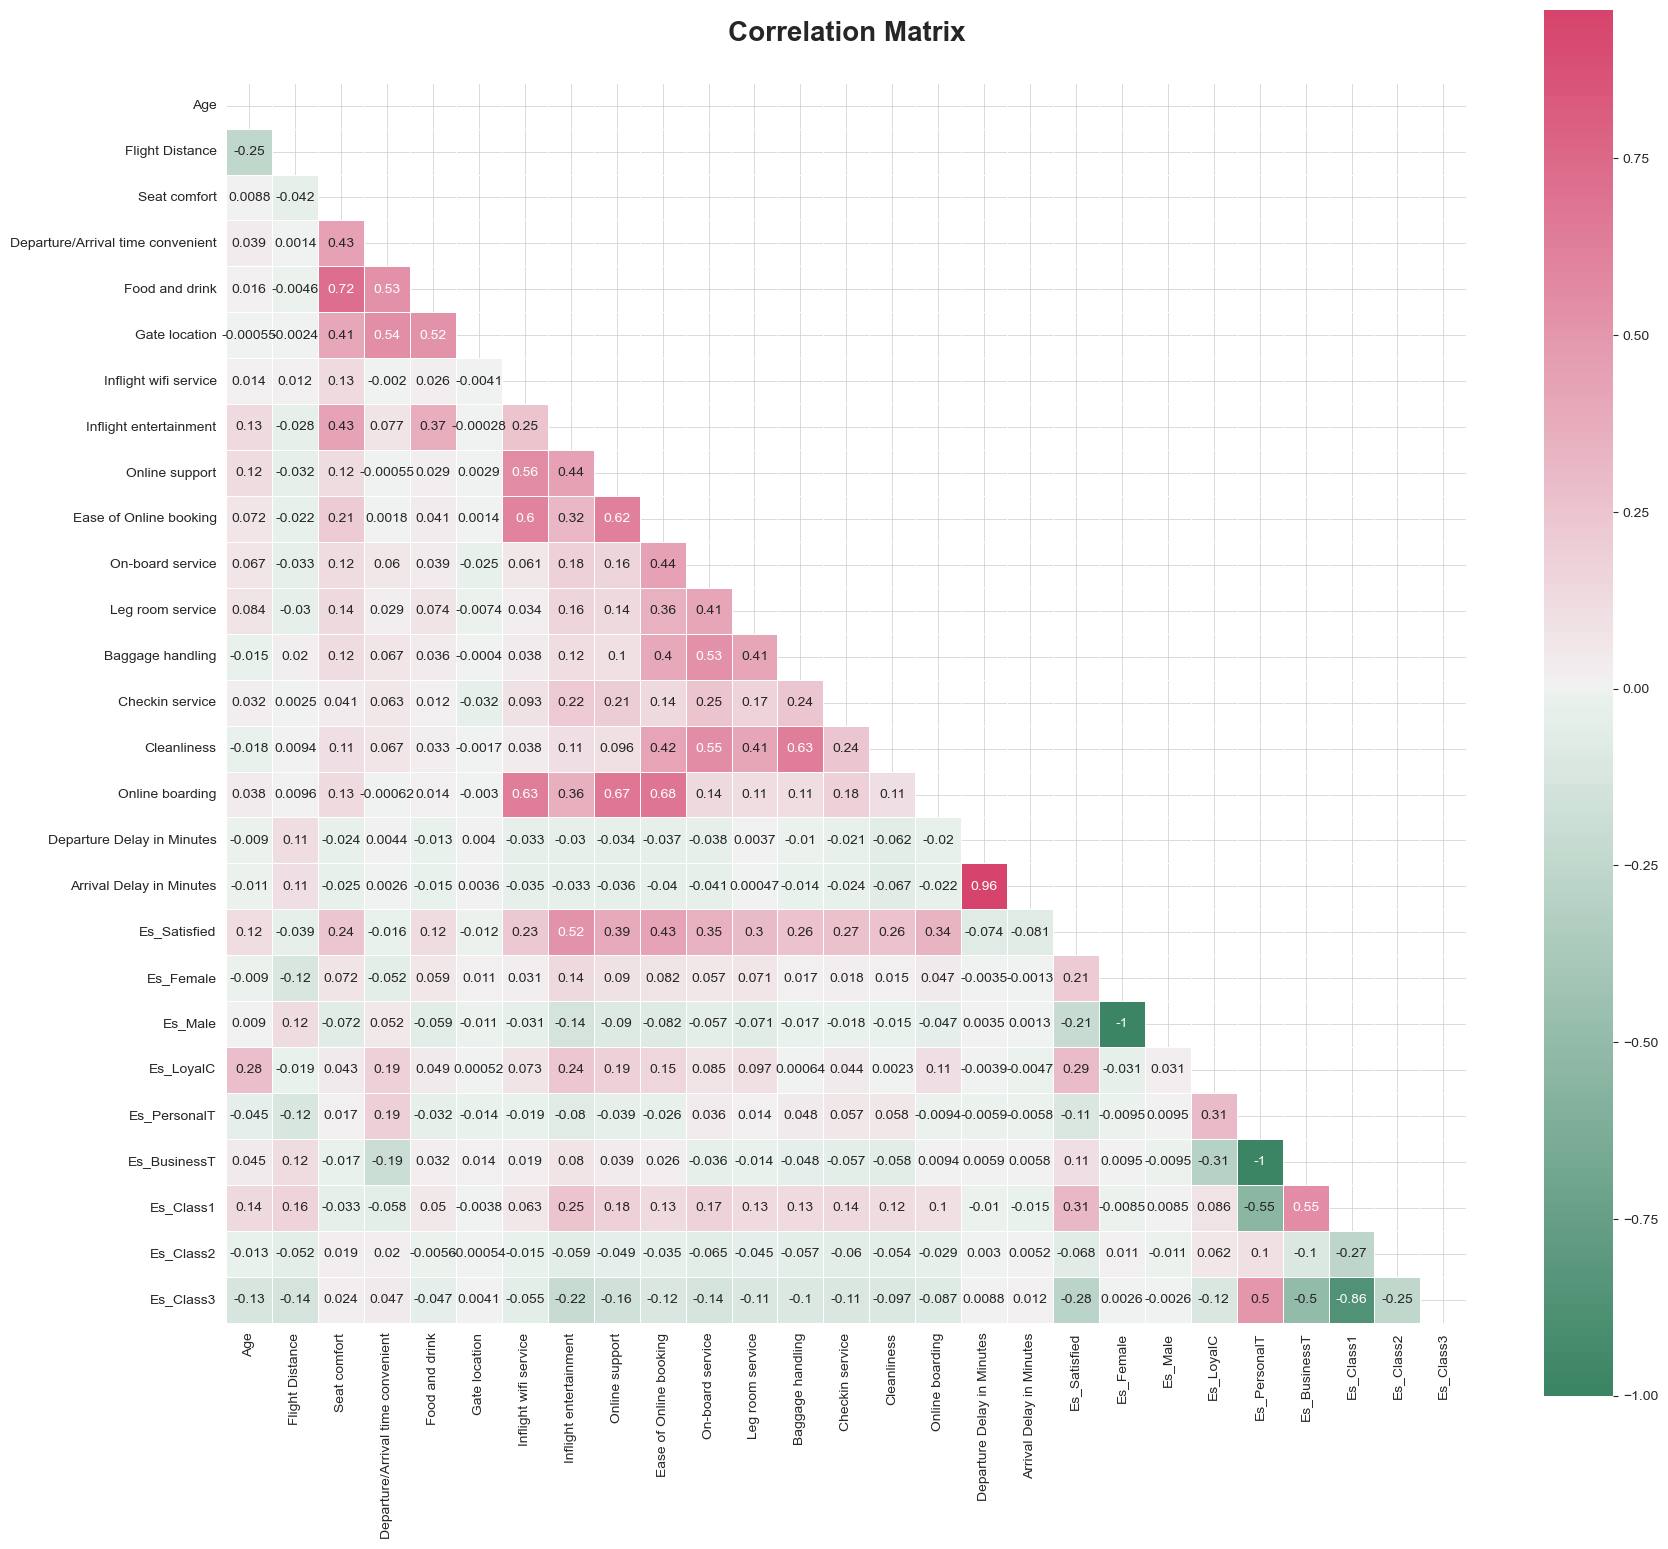

In [73]:
#Revisión de correlación entre las variables
columnas_seleccionadas = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Es_Satisfied', 'Es_Female', 'Es_Male', 'Es_LoyalC', 'Es_PersonalT', 'Es_BusinessT', 'Es_Class1', 'Es_Class2', 'Es_Class3']
df_corr = df[columnas_seleccionadas]
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

### Grafico y contextualizo ###
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 20))
plt.title('Correlation Matrix', fontsize=20, fontweight='bold', pad=30)
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [74]:
# Crear una máscara para seleccionar solo los valores de correlación por encima de 0.7 o por debajo de -0.7
mask = np.abs(corr) >= 0.7
np.fill_diagonal(mask.values, False)  # No considerar la correlación de una variable consigo misma

# Seleccionar las columnas con correlación alta
high_corr_columns = df_corr.columns[mask.any()]

# Mostrar las columnas con correlación alta
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Variables con correlación alta (0.7 =< abs(x))'+Style.RESET_ALL)
print(high_corr_columns)


Variables con correlación alta (0.7 =< abs(x))
Index(['Seat comfort', 'Food and drink', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Es_Female', 'Es_Male', 'Es_PersonalT',
       'Es_BusinessT', 'Es_Class1', 'Es_Class3'],
      dtype='object')


In [75]:
#Selecciono las características que se incluirán en el modelo considerando la correlación para evitar multicolinealidad y la variable objetivo
feature_names = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Arrival Delay in Minutes',  'Es_Female', 'Es_LoyalC', 'Es_BusinessT', 'Es_Class1', 'Es_Class2']
    
X = df[feature_names].values
y = df['Es_Satisfied'].values

#Creo un modelo de random forest para las características desagregadas
model = RandomForestClassifier(n_estimators = 150,
                               random_state = 123,
                               max_depth = 7,
                               min_samples_leaf = 100,
                               max_features = 4,
                               criterion = 'entropy')
model.fit(X, y)

feature_importances = model.feature_importances_*100

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance [%]': feature_importances})
importance_df = importance_df.sort_values('Importance [%]', ascending=False)
importance_df.sort_values(by = 'Importance [%]', ascending = False)

,Feature,Importance [%]
6,Inflight entertainment,28.201653
2,Seat comfort,16.714026
8,Ease of Online booking,11.263148
7,Online support,6.577788
9,On-board service,5.218410
17,Es_LoyalC,4.733858
10,Leg room service,4.490362
19,Es_Class1,4.246501
14,Online boarding,3.166364
18,Es_BusinessT,2.621051


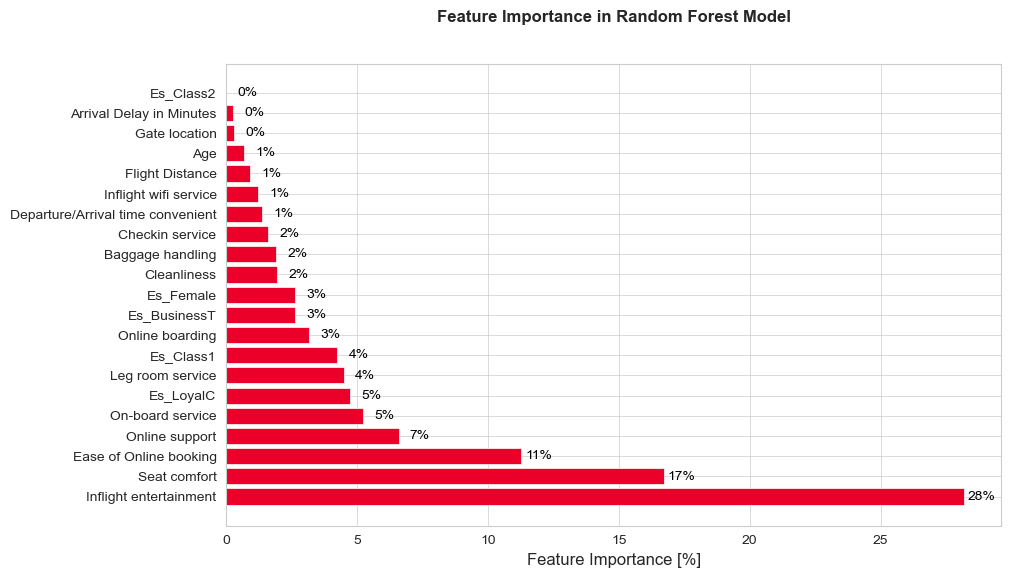

In [76]:
### Grafico y contextualizo ###
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

importance_df = importance_df.sort_values(by = 'Importance [%]', ascending = False)
importance_df = importance_df.loc[importance_df['Importance [%]'] > 0,]

plt.barh(importance_df['Feature'],
         importance_df['Importance [%]'],
         align='center',
         color='#EB0029')

plt.xlabel('Feature Importance [%]', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=12, fontweight='bold', pad=30)

patches = plt.gca().patches  # Obtener los objetos de las barras

for bar, importance in zip(patches, importance_df['Importance [%]']):
    color = 'black'
    plt.annotate(f'{importance:.0f}%',
                 (bar.get_width() + 1.2, bar.get_y() + bar.get_height() / 2),
                 va='center', ha='right', fontsize=10, color=color)

#Printeo todo
plt.show()

###### 3.3.2. Variables predictoras

In [77]:
# Genero una variable predictora nueva llamada Satisfaction Metric que considera todas las variables medidas por las aerolíneas según la importancia de la variable
feature_names_metric = ['Seat comfort', 'Departure/Arrival time convenient', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
Xm = df[feature_names_metric].values
ym = df['Es_Satisfied'].values

# Crear un modelo de random forest para las características desagregadas
model_metric = RandomForestClassifier(n_estimators=150, random_state=123, max_depth=7, min_samples_leaf=100, max_features=4, criterion='entropy')
model_metric.fit(Xm, ym)

# Obtener las importancias de las características
feature_importances_m = model_metric.feature_importances_

# Calcular el promedio ponderado de las características seleccionadas
df['Satisfaction_Metric'] = np.dot(Xm, feature_importances_m)

In [78]:
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Satisfacción'+Style.RESET_ALL)
satisf = df.groupby('satisfaction')['Satisfaction_Metric'].mean()
print(satisf.map('{:.2f}'.format))

Satisfacción
satisfaction
Dissatisfied    2.73
Satisfied       3.76
Name: Satisfaction_Metric, dtype: object


In [79]:
# Genero las variables predictoras
female_sat = df[['Es_Satisfied','Es_Female']].groupby(by=['Es_Female']).mean().reset_index()
female_sat.rename(columns={'Es_Satisfied': 'Female_Sat'}, inplace=True)
df = df.merge(female_sat,
              left_on = 'Es_Female',
              right_on = 'Es_Female',
              how = 'left')

loyal_sat = df[['Es_Satisfied','Es_LoyalC']].groupby(by=['Es_LoyalC']).mean().reset_index()
loyal_sat.rename(columns={'Es_Satisfied': 'Loyal_Sat'}, inplace=True)
df = df.merge(loyal_sat,
              left_on = 'Es_LoyalC',
              right_on = 'Es_LoyalC',
              how = 'left')

business_sat = df[['Es_Satisfied','Es_BusinessT']].groupby(by=['Es_BusinessT']).mean().reset_index()
business_sat.rename(columns={'Es_Satisfied': 'Business_Sat'}, inplace=True)
df = df.merge(business_sat,
              left_on = 'Es_BusinessT',
              right_on = 'Es_BusinessT',
              how = 'left')

class1_sat = df[['Es_Satisfied','Es_Class1']].groupby(by=['Es_Class1']).mean().reset_index()
class1_sat.rename(columns={'Es_Satisfied': 'Class1_Sat'}, inplace=True)
df = df.merge(class1_sat,
              left_on = 'Es_Class1',
              right_on = 'Es_Class1',
              how = 'left')

class2_sat = df[['Es_Satisfied','Es_Class2']].groupby(by=['Es_Class2']).mean().reset_index()
class2_sat.rename(columns={'Es_Satisfied': 'Class2_Sat'}, inplace=True)
df = df.merge(class2_sat,
              left_on = 'Es_Class2',
              right_on = 'Es_Class2',
              how = 'left')

seat_sat = df[['Es_Satisfied','Seat comfort']].groupby(by=['Seat comfort']).mean().reset_index()
seat_sat.rename(columns={'Es_Satisfied': 'Seat_Sat'}, inplace=True)
df = df.merge(seat_sat,
              left_on = 'Seat comfort',
              right_on = 'Seat comfort',
              how = 'left')

conv_sat = df[['Es_Satisfied','Departure/Arrival time convenient']].groupby(by=['Departure/Arrival time convenient']).mean().reset_index()
conv_sat.rename(columns={'Es_Satisfied': 'Conv_Sat'}, inplace=True)
df = df.merge(conv_sat,
              left_on = 'Departure/Arrival time convenient',
              right_on = 'Departure/Arrival time convenient',
              how = 'left')

enter_sat = df[['Es_Satisfied','Inflight entertainment']].groupby(by=['Inflight entertainment']).mean().reset_index()
enter_sat.rename(columns={'Es_Satisfied': 'Enter_Sat'}, inplace=True)
df = df.merge(enter_sat,
              left_on = 'Inflight entertainment',
              right_on = 'Inflight entertainment',
              how = 'left')

wifi_sat = df[['Es_Satisfied','Inflight wifi service']].groupby(by=['Inflight wifi service']).mean().reset_index()
wifi_sat.rename(columns={'Es_Satisfied': 'Wifi_Sat'}, inplace=True)
df = df.merge(wifi_sat,
              left_on = 'Inflight wifi service',
              right_on = 'Inflight wifi service',
              how = 'left')

support_sat = df[['Es_Satisfied','Online support']].groupby(by=['Online support']).mean().reset_index()
support_sat.rename(columns={'Es_Satisfied': 'Support_Sat'}, inplace=True)
df = df.merge(support_sat,
              left_on = 'Online support',
              right_on = 'Online support',
              how = 'left')

boarding_sat = df[['Es_Satisfied','Online boarding']].groupby(by=['Online boarding']).mean().reset_index()
boarding_sat.rename(columns={'Es_Satisfied': 'Boarding_Sat'}, inplace=True)
df = df.merge(boarding_sat,
              left_on = 'Online boarding',
              right_on = 'Online boarding',
              how = 'left')

service_sat = df[['Es_Satisfied','On-board service']].groupby(by=['On-board service']).mean().reset_index()
service_sat.rename(columns={'Es_Satisfied': 'Service_Sat'}, inplace=True)
df = df.merge(service_sat,
              left_on = 'On-board service',
              right_on = 'On-board service',
              how = 'left')

legroom_sat = df[['Es_Satisfied','Leg room service']].groupby(by=['Leg room service']).mean().reset_index()
legroom_sat.rename(columns={'Es_Satisfied': 'Legroom_Sat'}, inplace=True)
df = df.merge(legroom_sat,
              left_on = 'Leg room service',
              right_on = 'Leg room service',
              how = 'left')

baggage_sat = df[['Es_Satisfied','Baggage handling']].groupby(by=['Baggage handling']).mean().reset_index()
baggage_sat.rename(columns={'Es_Satisfied': 'Baggage_Sat'}, inplace=True)
df = df.merge(baggage_sat,
              left_on = 'Baggage handling',
              right_on = 'Baggage handling',
              how = 'left')

gate_sat = df[['Es_Satisfied','Gate location']].groupby(by=['Gate location']).mean().reset_index()
gate_sat.rename(columns={'Es_Satisfied': 'Gate_Sat'}, inplace=True)
df = df.merge(gate_sat,
              left_on = 'Gate location',
              right_on = 'Gate location',
              how = 'left')

booking_sat = df[['Es_Satisfied','Ease of Online booking']].groupby(by=['Ease of Online booking']).mean().reset_index()
booking_sat.rename(columns={'Es_Satisfied': 'Booking_sat'}, inplace=True)
df = df.merge(booking_sat,
              left_on = 'Ease of Online booking',
              right_on = 'Ease of Online booking',
              how = 'left')

checkin_sat = df[['Es_Satisfied','Checkin service']].groupby(by=['Checkin service']).mean().reset_index()
checkin_sat.rename(columns={'Es_Satisfied': 'Checkin_Sat'}, inplace=True)
df = df.merge(checkin_sat,
              left_on = 'Checkin service',
              right_on = 'Checkin service',
              how = 'left')

cleanliness_sat = df[['Es_Satisfied','Cleanliness']].groupby(by=['Cleanliness']).mean().reset_index()
cleanliness_sat.rename(columns={'Es_Satisfied': 'Cleanliness_Sat'}, inplace=True)
df = df.merge(cleanliness_sat,
              left_on = 'Cleanliness',
              right_on = 'Cleanliness',
              how = 'left')

In [80]:
df = df.rename(columns={'Flight Distance': 'Flight_Distance'})
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype('int64')
df = df.rename(columns={'Arrival Delay in Minutes': 'Arrival_Delay_in_Minutes'})
df['Passenger_ID'] = df.index
df = pd.concat([df['Passenger_ID'], df.drop('Passenger_ID', axis=1)], axis=1)

#### <span style="color:gray">**3.3. Algorithm selection**</span>
Dado que la interpretabilidad del modelo es crucial y hay que comprender el impacto relativo de cada característica medida, se elige como algoritmo Random Forest, ya que proporciona coeficientes que indican la contribución de cada característica.

###### 3.3.1. Train / Test
Separación del dataset en Grupo de Entrenamiento (80%) y Testeo (20%)

In [81]:
cantidad_registros = df.shape[0]
semilla = 15
np.random.seed(semilla)
serie_random = np.random.rand(cantidad_registros)
df['TRAIN'] = np.where(serie_random < 0.2, 0, 1)

resumen = df.groupby('TRAIN').agg(      
    Cant = ('satisf_binaria', 'count'),
    Cant_Exito = ('satisf_binaria', 'sum'),    
    Tasa_Exito = ('satisf_binaria', 'mean')
).reset_index()
print(resumen)

   TRAIN    Cant  Cant_Exito  Tasa_Exito
0      0   25951       14104    0.543486
1      1  103929       56983    0.548288


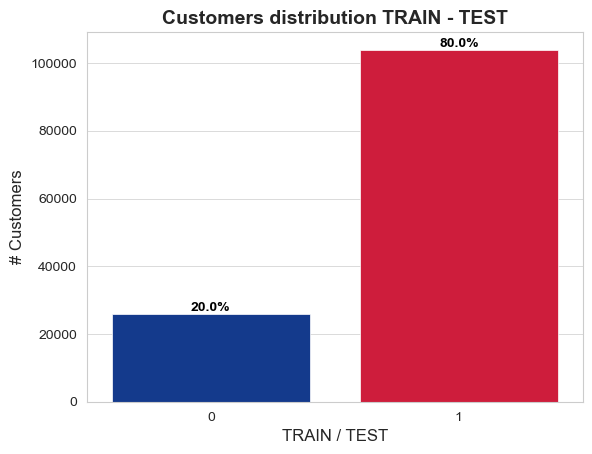

In [82]:
cantidad = len(df['satisf_binaria'])

# Grafico y contextualizo
sns.set_style("whitegrid")
fig, ax = figsize = (16, 6)

sns.countplot(data = df,
              x = "TRAIN",
              palette = colores)
plt.xlabel('TRAIN / TEST')
plt.ylabel('# Customers')
plt.title('Customers distribution TRAIN - TEST',fontsize=14,fontweight='bold')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

###### 3.3.3. Modelo 1 - Regresión Logística

In [83]:
# Genero el modelo
formula = "Es_Satisfied ~ Female_Sat + Business_Sat + Loyal_Sat + Class1_Sat + Class2_Sat + Age + Flight_Distance + Arrival_Delay_in_Minutes + Seat_Sat + Conv_Sat + Gate_Sat + Wifi_Sat + Enter_Sat + Support_Sat + Boarding_Sat + Service_Sat + Legroom_Sat + Baggage_Sat + Checkin_Sat + Cleanliness_Sat + Satisfaction_Metric"
reg_log = sm.logit(formula, data = df[df['TRAIN']==1]).fit()

# Resumen de los resultados
print(reg_log.summary())

df['Predict_Prob_RegLog'] = reg_log.predict(df)

Optimization terminated successfully.
         Current function value: 0.275163
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Es_Satisfied   No. Observations:               103929
Model:                          Logit   Df Residuals:                   103907
Method:                           MLE   Df Model:                           21
Date:                Mon, 12 Feb 2024   Pseudo R-squ.:                  0.6003
Time:                        18:37:43   Log-Likelihood:                -28597.
converged:                       True   LL-Null:                       -71553.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -28.4741      0.415    -68.567      0.000     -29.288

Dado que las variables Arrival delay, Age and Flight Distance tienen bajo peso en el modelo (debajo de 1%) y los coeficientes que las acompañan tienden a 0, se opta por eliminarlas del modelo.

In [92]:
# Genero el modelo
formula = "Es_Satisfied ~ Female_Sat + Business_Sat + Loyal_Sat + Class1_Sat + Class2_Sat + Seat_Sat + Conv_Sat + Wifi_Sat + Enter_Sat + Support_Sat + Boarding_Sat + Service_Sat + Legroom_Sat + Baggage_Sat + Checkin_Sat + Cleanliness_Sat + Satisfaction_Metric"
reg_log = sm.logit(formula, data = df[df['TRAIN']==1]).fit()

# Resumen de los resultados
print(reg_log.summary())

df['Predict_Prob_RegLog'] = reg_log.predict(df)

Optimization terminated successfully.
         Current function value: 0.277051
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Es_Satisfied   No. Observations:               103929
Model:                          Logit   Df Residuals:                   103911
Method:                           MLE   Df Model:                           17
Date:                Mon, 12 Feb 2024   Pseudo R-squ.:                  0.5976
Time:                        18:38:18   Log-Likelihood:                -28794.
converged:                       True   LL-Null:                       -71553.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -28.3032      0.411    -68.871      0.000     -29.109     -27.498
Fe

In [93]:
# Coeficientes y p valores
coeficientes = reg_log.params
pvalores = reg_log.pvalues
print("")
print(Style.BRIGHT+Fore.LIGHTRED_EX+"Coeficientes"+Style.RESET_ALL)
print(coeficientes.round(4))
print("")
print(Style.BRIGHT+Fore.LIGHTRED_EX+"P-Values"+Style.RESET_ALL)
print(pvalores.round(6))


Coeficientes
Intercept             -28.3032
Female_Sat              4.9514
Business_Sat           12.4127
Loyal_Sat               6.7832
Class1_Sat              2.2712
Class2_Sat              1.3939
Seat_Sat                5.7442
Conv_Sat                2.8687
Wifi_Sat                0.7125
Enter_Sat               3.5440
Support_Sat             1.3820
Boarding_Sat            1.5120
Service_Sat             2.4821
Legroom_Sat             2.5880
Baggage_Sat             1.5263
Checkin_Sat             2.2725
Cleanliness_Sat         1.7418
Satisfaction_Metric    -0.2599
dtype: float64

P-Values
Intercept              0.000000
Female_Sat             0.000000
Business_Sat           0.000000
Loyal_Sat              0.000000
Class1_Sat             0.000000
Class2_Sat             0.000018
Seat_Sat               0.000000
Conv_Sat               0.000000
Wifi_Sat               0.000000
Enter_Sat              0.000000
Support_Sat            0.000000
Boarding_Sat           0.000000
Service_Sat        

In [94]:
# Predicciones 
df['Predict_Prob_RegLog'] = reg_log.predict(df)

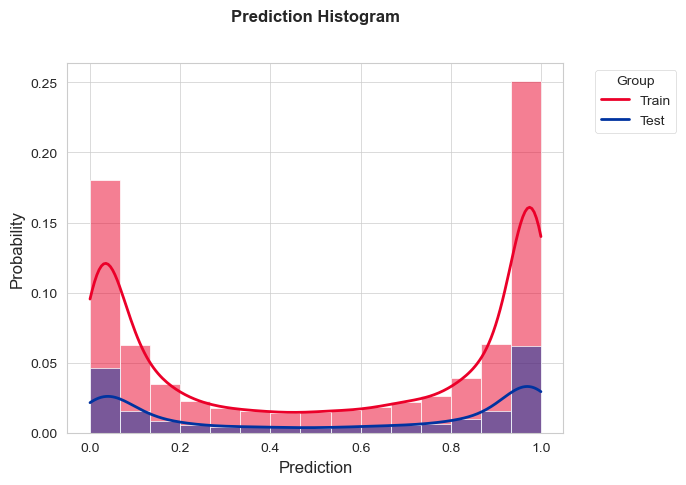

In [95]:
# Grafico y contextualizo
sns.set_style("whitegrid")
fig, ax = figsize = (16, 6)

ax = sns.histplot(data = df,
                  x = 'Predict_Prob_RegLog',  
                  bins = 15,
                  alpha = 0.5,
                  kde = True,
                  stat = 'probability', 
                  hue = 'TRAIN',
                  palette = colores
                  )

ax.set_title('Prediction Histogram', fontsize=12, fontweight='bold', pad=30) 
ax.set_xlabel('Prediction', fontsize=12)
ax.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Train', 'Test'])
plt.show()

###### 3.3.3.1. Matriz de confusión

Matriz de Confusión en entrenamiento
[[39342  7604]
 [ 4122 52861]]

Matriz de Confusión en testeo
[[ 9933  1914]
 [ 1024 13080]]



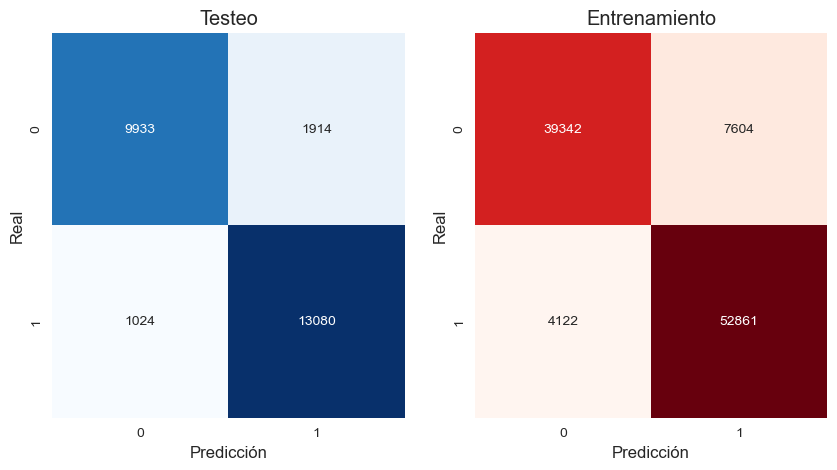

In [96]:
# Clasifico a los pasajeros según las predicciones usando un corte de 40% para deinir la clasificación de satisfacción
df['Satisf_Pred'] = np.where(df['Predict_Prob_RegLog'] > 0.4, 1, 0)

# Calculo la matriz de confusión para test y train
confusion_entrenamiento = confusion_matrix(df[df['TRAIN'] == 1]['satisf_binaria'], 
                                           df[df['TRAIN'] == 1]['Satisf_Pred'])

confusion_test = confusion_matrix(df[df['TRAIN'] == 0]['satisf_binaria'], 
                                    df[df['TRAIN'] == 0]['Satisf_Pred'])

print(Style.BRIGHT+Fore.LIGHTRED_EX+"Matriz de Confusión en entrenamiento"+Style.RESET_ALL)
print(confusion_entrenamiento)
print()
print(Style.BRIGHT+Fore.LIGHTRED_EX+"Matriz de Confusión en testeo"+Style.RESET_ALL)
print(confusion_test)
print()

# Grafico y contextualizo
fig, ax = plt.subplots(nrows = 1,
                      ncols = 2,
                      figsize = (10,5)) 

sns.heatmap(confusion_test, 
            annot=True, fmt='d', cmap='Blues', cbar=False, 
            ax=ax[0])
ax[0].set_title('Testeo')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_entrenamiento, 
            annot=True, fmt='d', cmap='Reds', cbar=False, 
            ax=ax[1])
ax[1].set_title('Entrenamiento')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

plt.show()

###### 3.3.3.2. Métricas derivadas de la matriz de confusión

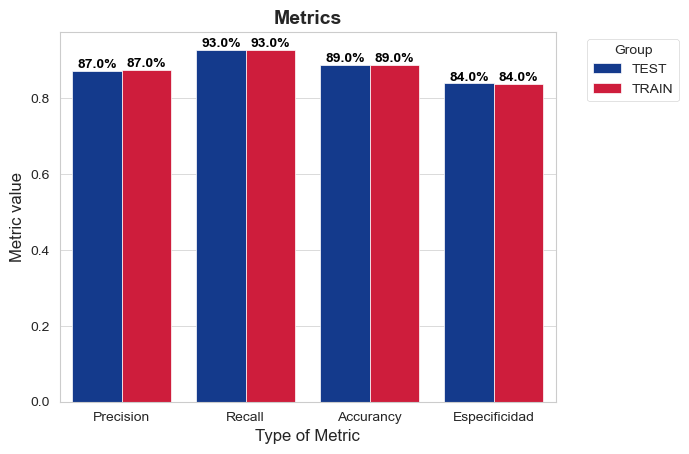

In [97]:
# Tomo los valores de la matriz de confusión
Total_TEST = sum(sum(confusion_test))
Total_TRAIN = sum(sum(confusion_entrenamiento))
TP_TEST = confusion_test[1,1]
TP_TRAIN = confusion_entrenamiento[1,1]
TN_TEST = confusion_test[0,0]
TN_TRAIN = confusion_entrenamiento[0,0]
FP_TEST = confusion_test[0,1]
FP_TRAIN = confusion_entrenamiento[0,1]
FN_TEST = confusion_test[1,0]
FN_TRAIN = confusion_entrenamiento[1,0]

# Calculo las métricas
Precision_TEST = TP_TEST / (TP_TEST + FP_TEST)
Precision_TRAIN = TP_TRAIN / (TP_TRAIN + FP_TRAIN)
Recall_TEST = TP_TEST / (TP_TEST + FN_TEST)
Recall_TRAIN = TP_TRAIN / (TP_TRAIN + FN_TRAIN)
Accurancy_TEST = (TP_TEST + TN_TEST) / Total_TEST
Accurancy_TRAIN = (TP_TRAIN + TN_TRAIN) / Total_TRAIN
Especificidad_TEST = TN_TEST / (TN_TEST + FP_TEST)
Especificidad_TRAIN = TN_TRAIN / (TN_TRAIN + FP_TRAIN)

# Presento todo en una misma tabla 
metricas = pd.DataFrame(columns=['Population', 'Metric','Value'])

# Precisión
nuevo_dato = {'Population': 'TEST', 
              'Metric': 'Precision',
              'Value': Precision_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Population': 'TRAIN', 
              'Metric': 'Precision',
              'Value': Precision_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Recall
nuevo_dato = {'Population': 'TEST', 
              'Metric': 'Recall',
              'Value': Recall_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Population': 'TRAIN', 
              'Metric': 'Recall',
              'Value': Recall_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Accurancy
nuevo_dato = {'Population': 'TEST', 
              'Metric': 'Accurancy',
              'Value': Accurancy_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Population': 'TRAIN', 
              'Metric': 'Accurancy',
              'Value': Accurancy_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Especificidad
nuevo_dato = {'Population': 'TEST', 
              'Metric': 'Especificidad',
              'Value': Especificidad_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Population': 'TRAIN', 
              'Metric': 'Especificidad',
              'Value': Especificidad_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Grafico y contextualizo 
sns.set_style("whitegrid")
fig, ax = figsize = (20, 8)

sns.barplot(data = metricas,
                x = 'Metric',
                y = 'Value',
                hue = 'Population',
                palette=colores)
plt.xlabel('Type of Metric')
plt.ylabel('Metric value')
plt.title('Metrics',fontsize=14,fontweight='bold')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0 
    y_text = p.get_height()  
    ax.text(x_text, y_text, f'{str(round(y_text,2) * 100)}%',  
            ha = 'center', 
            va = 'bottom', 
            fontsize = 10, color = 'black', fontweight = 'bold')
    
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')    
metricas_1 = plt.gcf()
plt.show()

###### 3.3.3.3. Curva ROC

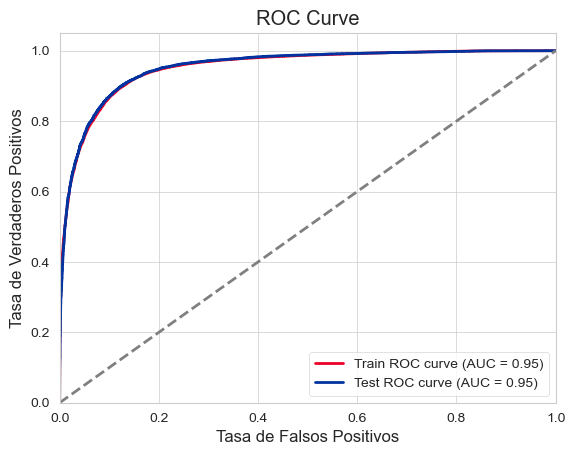

In [98]:
y_train = df.loc[df['TRAIN'] == 1,'satisf_binaria']
y_train_proba = df.loc[df['TRAIN'] == 1,'Predict_Prob_RegLog']
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = df.loc[df['TRAIN'] == 0,'satisf_binaria']
y_test_proba = df.loc[df['TRAIN'] == 0,'Predict_Prob_RegLog']
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafico y contextualizo
sns.set_style("whitegrid")
fig = figsize = (16, 6)

plt.plot(fpr_train, tpr_train, color='#eb0029', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='#0033a0', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('ROC Curve')
plt.legend(loc='lower right')
roc_1 = plt.gcf()
plt.show()

###### 3.3.4. Modelo 2 - Random Forest

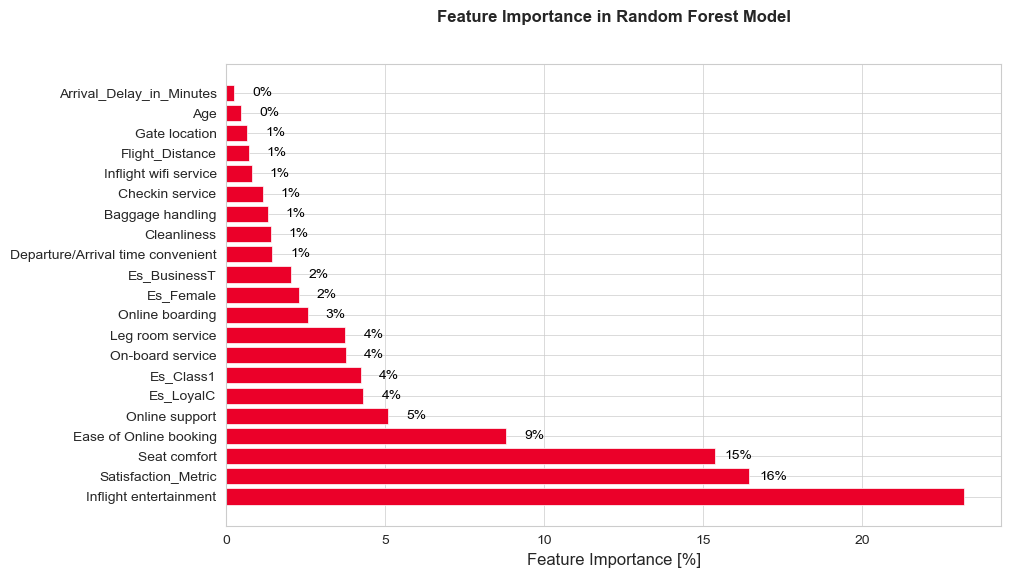

In [99]:
#Selecciono las características que se incluirán en el modelo considerando la correlación para evitar multicolinealidad y la variable objetivo
feature_names_1 = ['Age', 'Flight_Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Arrival_Delay_in_Minutes',  'Es_Female', 'Es_LoyalC', 'Es_BusinessT', 'Es_Class1', 'Satisfaction_Metric']
X1 = df[feature_names_1].values
y1 = df['Es_Satisfied'].values

# Filtro el conjunto de datos para obtener conjuntos de entrenamiento y prueba
X_train = X1[df['TRAIN'] == 1]
y_train = y1[df['TRAIN'] == 1]
X_test = X1[df['TRAIN'] == 0]
y_test = y1[df['TRAIN'] == 0]

#Creo un modelo de random forest
model_rf = RandomForestClassifier(n_estimators = 150,
                               random_state = 123,
                               max_depth = 7,
                               min_samples_leaf = 100,
                               max_features = 4,
                               criterion = 'entropy')

model_rf.fit(X_train, y_train)

feature_importances_1 = model_rf.feature_importances_*100

# Crear un DataFrame para visualizar la importancia de las características
importance_df1 = pd.DataFrame({'Feature': feature_names_1, 'Importance [%]': feature_importances_1})
importance_df1 = importance_df1.sort_values('Importance [%]', ascending=False)
importance_df1.sort_values(by = 'Importance [%]', ascending = False)

### Grafico y contextualizo ###
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

importance_df1 = importance_df1.sort_values(by = 'Importance [%]', ascending = False)
importance_df1 = importance_df1.loc[importance_df['Importance [%]'] > 0,]

plt.barh(importance_df1['Feature'],
         importance_df1['Importance [%]'],
         align='center',
         color='#EB0029')

plt.xlabel('Feature Importance [%]', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=12, fontweight='bold', pad=30)

patches = plt.gca().patches  # Obtener los objetos de las barras

for bar, importance in zip(patches, importance_df1['Importance [%]']):
    color = 'black'
    plt.annotate(f'{importance:.0f}%',
                 (bar.get_width() + 1.2, bar.get_y() + bar.get_height() / 2),
                 va='center', ha='right', fontsize=10, color=color)

#Printeo todo
plt.show()

###### 3.3.4.1. Matriz de confusión

Matriz de Confusión en entrenamiento
[[41196  5750]
 [ 3990 52993]]

Matriz de Confusión en testeo
[[10425  1422]
 [  934 13170]]



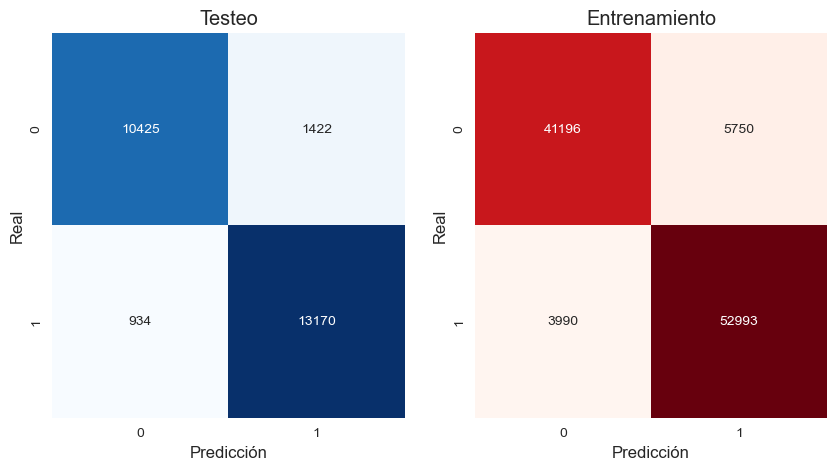

In [100]:
# Clasifico a los pasajeros según las predicciones del modelo de Random Forest usando un corte de 0.4 para definir la clasificación de satisfacción
df['Satisf_Pred_RF'] = np.where(model_rf.predict_proba(X1)[:, 1] > 0.4, 1, 0)

# Calculo la matriz de confusión para test y train
confusion_entrenamiento_rf = confusion_matrix(y_train, model_rf.predict(X_train))
confusion_test_rf = confusion_matrix(y_test, model_rf.predict(X_test))

print(Style.BRIGHT + Fore.LIGHTRED_EX + "Matriz de Confusión en entrenamiento" + Style.RESET_ALL)
print(confusion_entrenamiento_rf)
print()
print(Style.BRIGHT + Fore.LIGHTRED_EX + "Matriz de Confusión en testeo" + Style.RESET_ALL)
print(confusion_test_rf)
print()

# Grafico y contextualizo
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.heatmap(confusion_test_rf,
            annot=True, fmt='d', cmap='Blues', cbar=False,
            ax=ax[0])
ax[0].set_title('Testeo')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_entrenamiento_rf,
            annot=True, fmt='d', cmap='Reds', cbar=False,
            ax=ax[1])
ax[1].set_title('Entrenamiento')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

plt.show()


###### 3.3.4.2. Métricas derivadas de la matriz de confusión

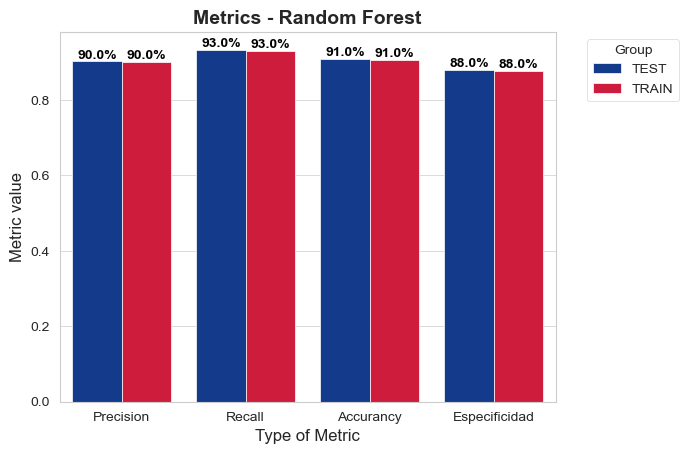

In [101]:
# Tomo los valores de la matriz de confusión para Random Forest
Total_TEST_RF = sum(sum(confusion_test_rf))
Total_TRAIN_RF = sum(sum(confusion_entrenamiento_rf))
TP_TEST_RF = confusion_test_rf[1, 1]
TP_TRAIN_RF = confusion_entrenamiento_rf[1, 1]
TN_TEST_RF = confusion_test_rf[0, 0]
TN_TRAIN_RF = confusion_entrenamiento_rf[0, 0]
FP_TEST_RF = confusion_test_rf[0, 1]
FP_TRAIN_RF = confusion_entrenamiento_rf[0, 1]
FN_TEST_RF = confusion_test_rf[1, 0]
FN_TRAIN_RF = confusion_entrenamiento_rf[1, 0]

# Calculo las métricas para Random Forest
Precision_TEST_RF = TP_TEST_RF / (TP_TEST_RF + FP_TEST_RF)
Precision_TRAIN_RF = TP_TRAIN_RF / (TP_TRAIN_RF + FP_TRAIN_RF)
Recall_TEST_RF = TP_TEST_RF / (TP_TEST_RF + FN_TEST_RF)
Recall_TRAIN_RF = TP_TRAIN_RF / (TP_TRAIN_RF + FN_TRAIN_RF)
Accurancy_TEST_RF = (TP_TEST_RF + TN_TEST_RF) / Total_TEST_RF
Accurancy_TRAIN_RF = (TP_TRAIN_RF + TN_TRAIN_RF) / Total_TRAIN_RF
Especificidad_TEST_RF = TN_TEST_RF / (TN_TEST_RF + FP_TEST_RF)
Especificidad_TRAIN_RF = TN_TRAIN_RF / (TN_TRAIN_RF + FP_TRAIN_RF)

# Presento todo en una misma tabla para Random Forest
metricas_rf = pd.DataFrame(columns=['Population', 'Metric', 'Value'])

# Precisión
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Precision',
                 'Value': Precision_TEST_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Precision',
                 'Value': Precision_TRAIN_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

# Recall
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Recall',
                 'Value': Recall_TEST_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Recall',
                 'Value': Recall_TRAIN_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

# Accurancy
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Accurancy',
                 'Value': Accurancy_TEST_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Accurancy',
                 'Value': Accurancy_TRAIN_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

# Especificidad
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Especificidad',
                 'Value': Especificidad_TEST_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Especificidad',
                 'Value': Especificidad_TRAIN_RF}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

# Grafico y contextualizo para Random Forest
sns.set_style("whitegrid")
fig, ax = figsize = (20, 8)

sns.barplot(data=metricas_rf,
            x='Metric',
            y='Value',
            hue='Population',
            palette=colores)
plt.xlabel('Type of Metric')
plt.ylabel('Metric value')
plt.title('Metrics - Random Forest', fontsize=14, fontweight='bold')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0
    y_text = p.get_height()
    ax.text(x_text, y_text, f'{str(round(y_text,2) * 100)}%',
            ha='center',
            va='bottom',
            fontsize=10, color='black', fontweight='bold')

plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
metricas_rf_plot = plt.gcf()
plt.show()


###### 3.3.4.3. Curva ROC

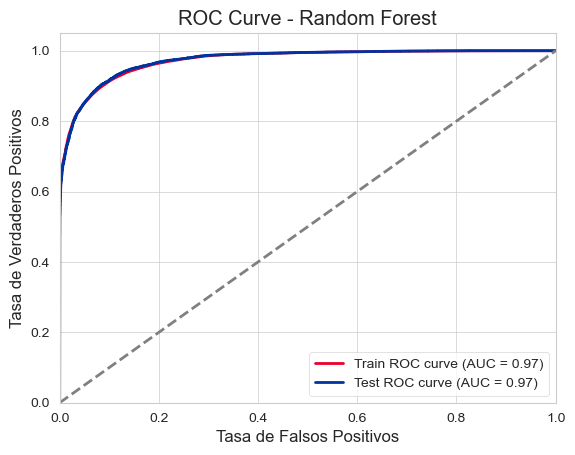

In [102]:
y_train_rf = df.loc[df['TRAIN'] == 1, 'satisf_binaria']
y_train_proba_rf = model_rf.predict_proba(X_train)[:, 1]
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train_rf, y_train_proba_rf)
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

y_test_rf = df.loc[df['TRAIN'] == 0, 'satisf_binaria']
y_test_proba_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test_rf, y_test_proba_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

# Grafico y contextualizo para Random Forest
sns.set_style("whitegrid")
fig = figsize = (16, 6)

plt.plot(fpr_train_rf, tpr_train_rf, color='#eb0029', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_rf:.2f})')
plt.plot(fpr_test_rf, tpr_test_rf, color='#0033a0', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
roc_rf_plot = plt.gcf()
plt.show()

###### 3.3.5. PCA
<br>
El análisis de componentes principales (PCA) realizado revela información crucial sobre la estructura de los datos relacionados con la satisfacción de los pasajeros de la aerolínea. 
Al observar los resultados, se destaca que ciertas variables tienen una influencia significativa en la variabilidad general de los datos representada por los componentes principales. Por ejemplo, las variables 'Conv_Sat', 'Business_Sat' y 'Class2_Sat' emergen como las más relevantes para el primer componente principal, lo que sugiere una fuerte correlación entre la satisfacción general, la satisfacción de los pasajeros de negocios, la satisfacción con la clase Eco Plus y la relevancia de la conveniencia de la hora de llegada/salida del vuelo en la satisfacción general.
Por otro lado, el segundo componente principal se ve impulsado principalmente por variables como 'Wifi_Sat', 'Boarding_Sat' y 'Support_Sat', lo que indica una asociación destacada entre la satisfacción con el WiFi a bordo, el proceso de embarque y el soporte en línea. 
Aunque los dos primeros componentes principales solo explican conjuntamente el 35.78% de la variabilidad total de los datos, estos resultados aún ofrecen una comprensión valiosa sobre las relaciones subyacentes entre las variables y cómo contribuyen a la satisfacción general de los pasajeros de la aerolínea.

In [129]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecciono las variables que deseas incluir en el PCA
variables_pca = ['Female_Sat', 'Business_Sat', 'Loyal_Sat', 'Class1_Sat', 'Class2_Sat', 
                 'Seat_Sat', 'Conv_Sat', 'Wifi_Sat', 'Enter_Sat', 'Support_Sat', 
                 'Boarding_Sat', 'Service_Sat', 'Legroom_Sat', 'Baggage_Sat', 
                 'Checkin_Sat', 'Cleanliness_Sat', 'Satisfaction_Metric']

# Estándarizo los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variables_pca])

# Ajusto el modelo PCA con dos componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Exploración de las cargas de los dos primeros componentes principales
loadings = pca.components_
component_1_loadings = loadings[0]
component_2_loadings = loadings[1]

# Variables más relevantes en los dos primeros componentes
most_relevant_variables_component_1 = [variables_pca[i] for i in component_1_loadings.argsort()[::-1][:3]]
most_relevant_variables_component_2 = [variables_pca[i] for i in component_2_loadings.argsort()[::-1][:3]]

print(Style.BRIGHT + Fore.LIGHTRED_EX + "Variables más relevantes para el primer componente principal:" + Style.RESET_ALL , most_relevant_variables_component_1)
print(Style.BRIGHT + Fore.LIGHTRED_EX + "Variables más relevantes para el segundo componente principal:" + Style.RESET_ALL, most_relevant_variables_component_2)

# Calculo la proporción acumulada de varianza explicada
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
print("\n" + Style.BRIGHT + Fore.LIGHTRED_EX + "Proporción acumulada de varianza explicada por los primeros {}".format(len(explained_variance_ratio)) + " componentes principales: " + Style.RESET_ALL + "{:.2f}%".format(cumulative_explained_variance_ratio[-1] * 100))
# Calculo la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print("- Proporción de varianza explicada por el componente principal {}: ".format(i+1) + "{:.2f}%".format(ratio * 100))


Variables más relevantes para el primer componente principal: ['Conv_Sat', 'Business_Sat', 'Class2_Sat']
Variables más relevantes para el segundo componente principal: ['Wifi_Sat', 'Boarding_Sat', 'Support_Sat']

Proporción acumulada de varianza explicada por los primeros 2 componentes principales: 35.78%
- Proporción de varianza explicada por el componente principal 1: 24.25%
- Proporción de varianza explicada por el componente principal 2: 11.53%


#### <span style="color:gray">**3.4. Conclusiones y elección del Modelo**</span>

El modelo de regresión logística y el modelo de Random Forest fueron sometidos a un análisis exhaustivo para evaluar su desempeño en la predicción de la satisfacción de los clientes de la aerolínea.

En el caso del modelo de regresión logística, los 16 coeficientes asociados a las variables predictoras demostraron una significancia estadística robusta con un valor p igual a 0, respaldando la solidez de las relaciones identificadas. Este modelo exhibe un rendimiento excepcional, logrando una precisión del 88% en el conjunto de entrenamiento (TRAIN) y del 87% en el conjunto de prueba (TEST). La Recall se mantiene fuerte en ambos conjuntos con un 93%, indicando la capacidad del modelo para identificar correctamente las instancias positivas.

Es destacable la consistencia en las métricas entre TRAIN y TEST, con precisiones, Recall, exactitud (Accuracy) y especificidad alrededor del 80%, resaltando la capacidad de generalización del modelo en datos no vistos.

La curva ROC del modelo de regresión logística, desviada marcadamente hacia la esquina superior izquierda y un área bajo la curva (AUC) de 0.95 en ambos conjuntos, evidencian una capacidad discriminativa excepcional.

En contraste, el modelo de Random Forest presenta métricas ligeramente superiores. La precisión en TRAIN y TEST es del 90%, con una Recall constante en el 93%. La exactitud y especificidad se mantienen en el 91% y 88%, respectivamente, en ambos conjuntos. Desviada marcadamente hacia la esquina superior izquierda y un área bajo la curva (AUC) de 0.97 en ambos conjuntos, evidencian una capacidad discriminativa buena y mejor en comparación con el modelo de regresión logística.

El análisis de componentes principales (PCA) realizado revela información crucial sobre la estructura de los datos relacionados con la satisfacción de los pasajeros de una aerolínea. Al observar los resultados, se destaca que conservar todas las variables individuales sin sintetizarlas es crucial para comprender completamente todos los factores que afectan a nuestro modelo. Esta decisión se basa en varios puntos importantes, como la granularidad de los datos, la capacidad de ajuste del modelo, la capacidad de descubrir relaciones no lineales y la transparencia del modelo.

En resumen, tanto el modelo de regresión logística como el modelo de Random Forest mostraron un rendimiento excepcional en la predicción de la satisfacción del cliente de la aerolínea. Sin embargo, el modelo de Random Forest superó ligeramente al de regresión logística en términos de precisión y capacidad discriminativa, lo que sugiere que podría ser la opción preferida debido a su capacidad para manejar conjuntos de datos complejos y proporcionar una mejor capacidad de predicción en este contexto específico.